<a href="https://colab.research.google.com/github/lcipolina/ML_Fundamentals/blob/main/Assignment2-part2_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Asignment
Implement feature reduction and classification tasks, as described below, in Python. You may utilize built-in libraries. You will be utilizing the Spambase data set described further in section

### PCA
The Spambase data set from the machine learning repository consists of 57 features. Implement feature reduction with principal component analysis (PCA). Let the number of features after reduction be s, where s < 57. Explain how you chose an appropriate value for s.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
# read in dataset
data = np.genfromtxt('spambase.data', delimiter=',')

array([1., 1., 1., ..., 0., 0., 0.])

In [5]:
# get column names from names file to understand the features
f = open('spambase.names', 'r')
lines = [line.strip() for line in f]
f.close()
# comment lines start with | or 1 in this case + empty lines; colnames and type are separated by :
colnames = [line.partition(':')[0] for line in lines if not (len(line) == 0 or line[0] == '|' or line[0] == '1')]
# need to add the name for the final column
colnames.append('spam')
len(colnames)

58

In [49]:
# store as DataFrame
import pandas as pd
df = pd.DataFrame(data, columns=colnames)

# Nicer view of the data, easier to explore
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
1813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022,0.022,0.019,0.022,0.022,0.022,3.482,5.0,5902.0,0.0
1814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.85,0.0,0.0,0.0,0.0,1.7,0.0,0.0,0.0,2.56,0.0,1.7,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.299,0.000,0.000,0.149,0.000,0.000,1.040,2.0,26.0,0.0
1815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,33.33,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.0,3.0,0.0
1816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,5.12,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.28,0.0,2.56,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.131,0.000,0.262,0.000,0.000,1.625,7.0,65.0,0.0
1817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.07,0.0,0.07,0.0,0.0,0.0,0.07,0.0,0.0,0.0,0.00,0.0,0.00,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.104,0.324,0.000,0.000,0.011,4.411,28.0,1866.0,0.0


We do feature reduction with PCA (Principal Component Analysis).

Look at the value of "Explained Variance" of
the principal components and select number of components such that the sum of
explained variance is over 0.85


The code below plots the explained variance against the number of components needed.

We see that to achieve a *cumulative* variance higher than 80%, we need more than 40 principal components

In [51]:
df_x = df.drop('spam', axis=1)
df_x.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
1813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022,0.022,0.019,0.022,0.022,0.022,3.482,5.0,5902.0
1814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.85,0.0,0.0,0.0,0.0,1.7,0.0,0.0,0.0,2.56,0.0,1.7,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.299,0.000,0.000,0.149,0.000,0.000,1.040,2.0,26.0
1815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,33.33,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.0,3.0
1816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,5.12,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.28,0.0,2.56,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.131,0.000,0.262,0.000,0.000,1.625,7.0,65.0
1817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.07,0.0,0.07,0.0,0.0,0.0,0.07,0.0,0.0,0.0,0.00,0.0,0.00,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.104,0.324,0.000,0.000,0.011,4.411,28.0,1866.0


In [52]:
# Standardizing the features (i.e. standarize everything except the label column)
ArraySS = StandardScaler().fit_transform(df.drop('spam', axis=1)) 
ArraySS.shape #print shape of standardized data

(5576, 57)

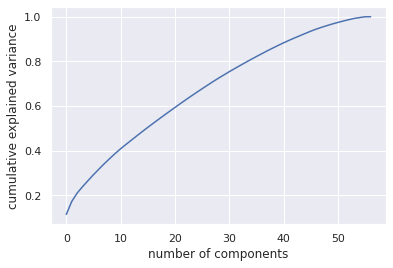

In [53]:
sns.set()
pca = PCA().fit(ArraySS)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Now we will try a PCA with 40 number of components

and print their exmplaned variance

In [54]:
#****************************************
# Perform PCA
pca = PCA(n_components=40)
PCAData = pca.fit_transform(ArraySS)

#****************************************
# Explained Variance
print("\n")
print("PCA Explained Variance")
print(pca.explained_variance_ratio_)
print("\n")




PCA Explained Variance
[0.11466887 0.0578196  0.0379054  0.02868595 0.02698609 0.0265099
 0.02489339 0.02459384 0.02311337 0.02251619 0.02103577 0.01974536
 0.01928349 0.0192269  0.01900799 0.01866442 0.0182694  0.01796839
 0.01783106 0.01758546 0.01746191 0.01743262 0.01702189 0.01683448
 0.01634799 0.01613811 0.01605045 0.01583413 0.01524373 0.01467955
 0.01463021 0.01397802 0.01382731 0.01368112 0.01326438 0.01308655
 0.01288227 0.01277848 0.01212793 0.01188062]




Now we plot the numbers obtained above. 

This is the proportion of variance explained by each component

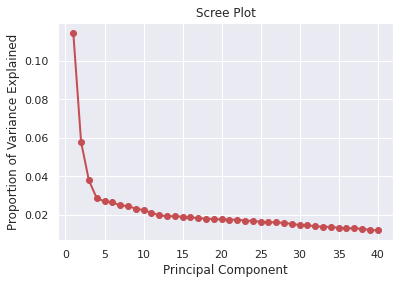

In [55]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

Now we plot how many components we would need to achieve a 95% cumulative variance

We see that we would need 49 principal components

In [56]:
#****************************************
# Perform PCA
clf = PCA(0.95) # keep 95% of variance
X_trans = clf.fit_transform(ArraySS)
print(X_trans.shape)  #these are the new features derived from the PCA
#****************************************

(5576, 48)


In [57]:
X_trans

array([[-0.64055864,  0.63646288,  3.7341415 , ...,  2.60249578,
         3.47161522, -0.80500901],
       [-0.67793257,  0.39149104,  0.48269553, ..., -1.46759525,
         0.78600061,  3.04137856],
       [ 0.28340852, -2.9206436 ,  0.02288615, ...,  1.14887937,
         0.30816326, -0.4751932 ],
       ...,
       [-0.9184086 ,  0.46149888, -1.55757141, ...,  0.60690294,
         0.09163026,  0.19772221],
       [-1.31484935,  1.95647131, -0.82448326, ...,  0.12217786,
        -0.30194941, -1.86815466],
       [-0.68613523, -0.43179052, -1.28035267, ..., -0.22993233,
        -0.11522287,  0.21786013]])

### PART 2  - Naive Bayes Classifier

Implement classification using Naive Bayes’ classifier, as described below:
* Split the data into train-test set in 70-30 ratio.
* If the classes are unbalanced, that is, many more samples in one class versus the other, then perform class balancing in the train set, using upsampling.
* Train the classifier with the train data set.
* Assess the accuracy of the classifier, on the test data set, with measures such as confusion matrix, precision, recall and F-score.
* Discuss the results.

In [12]:
import sklearn
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import pandas as pd

In [13]:
data = pd.read_csv('spambase.data', header=None)
data.rename(columns={57:'is_spam'}, inplace=True)

Study of the balancing of the data and Upsampling

SMOTE(SyntheticMinorityOversamplingTechnique) — upsampling:-
It works based on the KNearestNeighbours algorithm, synthetically generating data points that fall in the proximity of the already existing outnumbered group. The input records should not contain any null values when applying this approach.

In [14]:
#Upsampling minority class
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[data.is_spam==0]
df_minority = df[data.is_spam==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=2788,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.spam.value_counts()

1.0    2788
0.0    2788
Name: spam, dtype: int64

In [15]:
data = df_upsampled

In [16]:
spam = data[data['spam'] == 1]
ham = data[data['spam'] == 0]

In [17]:
spam_train, spam_test = train_test_split(spam, train_size=0.7)
ham_train, ham_test = train_test_split(ham, train_size=0.7)

In [18]:
# Separate X (features) and Y (target variable)
X_train = ham_train.append(spam_train)
y_train = X_train.pop('spam')

X_test = ham_test.append(spam_test)
y_test = X_test.pop('spam')

In [19]:
y_test.value_counts()

1.0    837
0.0    837
Name: spam, dtype: int64

In [20]:
spam_bayes = MultinomialNB()
spam_bayes.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [21]:
spam_bayes.score(X_test, y_test)

0.7598566308243727

In [22]:
spam_bayes.score(X_train, y_train)

0.7680676576114813

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [24]:
#***********************************
# Perform Prediction on Test Data; note that we use features (X) for
# prediction, and class  labels (Y) for comparison 
PredictY = spam_bayes.predict(X_test)
PredictYM = PredictY.astype(int)

# Series to array
ArrayTestX = X_test.to_numpy()
ArrayTestY = y_test.to_numpy()

#***********************************
# Compare predicted class labels with true class labels
print('True Class Labels')
print(ArrayTestY)
print("\n")

print('Predicted Class Labels')
print(PredictY)
print("\n")

# Print confusion matrix
CF = confusion_matrix(ArrayTestY, PredictY)
print("Confusion Matrix Test Set")
print(CF)
print("\n")

# Print classification report
CP = classification_report(ArrayTestY, PredictY)
print(CP)



True Class Labels
[0. 0. 0. ... 1. 1. 1.]


Predicted Class Labels
[0. 0. 0. ... 1. 0. 1.]


Confusion Matrix Test Set
[[683 154]
 [248 589]]


              precision    recall  f1-score   support

         0.0       0.73      0.82      0.77       837
         1.0       0.79      0.70      0.75       837

    accuracy                           0.76      1674
   macro avg       0.76      0.76      0.76      1674
weighted avg       0.76      0.76      0.76      1674



### Perform NBC with the variables obtained from the PCA

1. We need to append back the lables (i.e. spam, no-spam)
2. Then we can perform the NBC with the PCA variables
3. Then we can compare the performance between the NBC with the original data and several configurations of PCA

In [27]:
lables = data['spam']
lables

1813    0.0
1814    0.0
1815    0.0
1816    0.0
1817    0.0
       ... 
1547    1.0
1052    1.0
1461    1.0
490     1.0
1446    1.0
Name: spam, Length: 5576, dtype: float64